In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = []
with open("data.txt", "r") as f:
    for line in f:
        data.append(list(map(int, line.replace("\n", "").split(","))))

In [5]:
data = np.asarray([line for line in data if line[1] >= 50])
data

array([[1546756996811,            76],
       [1546756997715,            75],
       [1546756998694,            75],
       [1546756999672,            75],
       [1546757000763,            75],
       [1546757001788,            74],
       [1546757002701,            80],
       [1546757003692,            85],
       [1546757004790,            88],
       [1546757005753,            91],
       [1546757006671,            92],
       [1546757007763,            94],
       [1546757008857,            93],
       [1546757009718,            87],
       [1546757010655,            84],
       [1546757011617,            83],
       [1546757012689,            82],
       [1546757013699,            80],
       [1546757014683,            79],
       [1546757015635,            78],
       [1546757016652,            76],
       [1546757017671,            75],
       [1546757018651,            74],
       [1546757019683,            74],
       [1546757020641,            73],
       [1546757021600,   

In [6]:
first_time = data[0][0]

In [7]:
data.T[0] -= data[0][0]

In [8]:
data

array([[     0,     76],
       [   904,     75],
       [  1883,     75],
       [  2861,     75],
       [  3952,     75],
       [  4977,     74],
       [  5890,     80],
       [  6881,     85],
       [  7979,     88],
       [  8942,     91],
       [  9860,     92],
       [ 10952,     94],
       [ 12046,     93],
       [ 12907,     87],
       [ 13844,     84],
       [ 14806,     83],
       [ 15878,     82],
       [ 16888,     80],
       [ 17872,     79],
       [ 18824,     78],
       [ 19841,     76],
       [ 20860,     75],
       [ 21840,     74],
       [ 22872,     74],
       [ 23830,     73],
       [ 24789,     74],
       [ 25939,     74],
       [ 26819,     74],
       [ 27754,     75],
       [ 28808,     76],
       [ 29770,     77],
       [ 30850,     78],
       [ 31858,     79],
       [ 32802,     78],
       [ 33792,     77],
       [ 34784,     76],
       [ 35731,     75],
       [ 36777,     75],
       [ 37836,     75],
       [ 38819,     75],


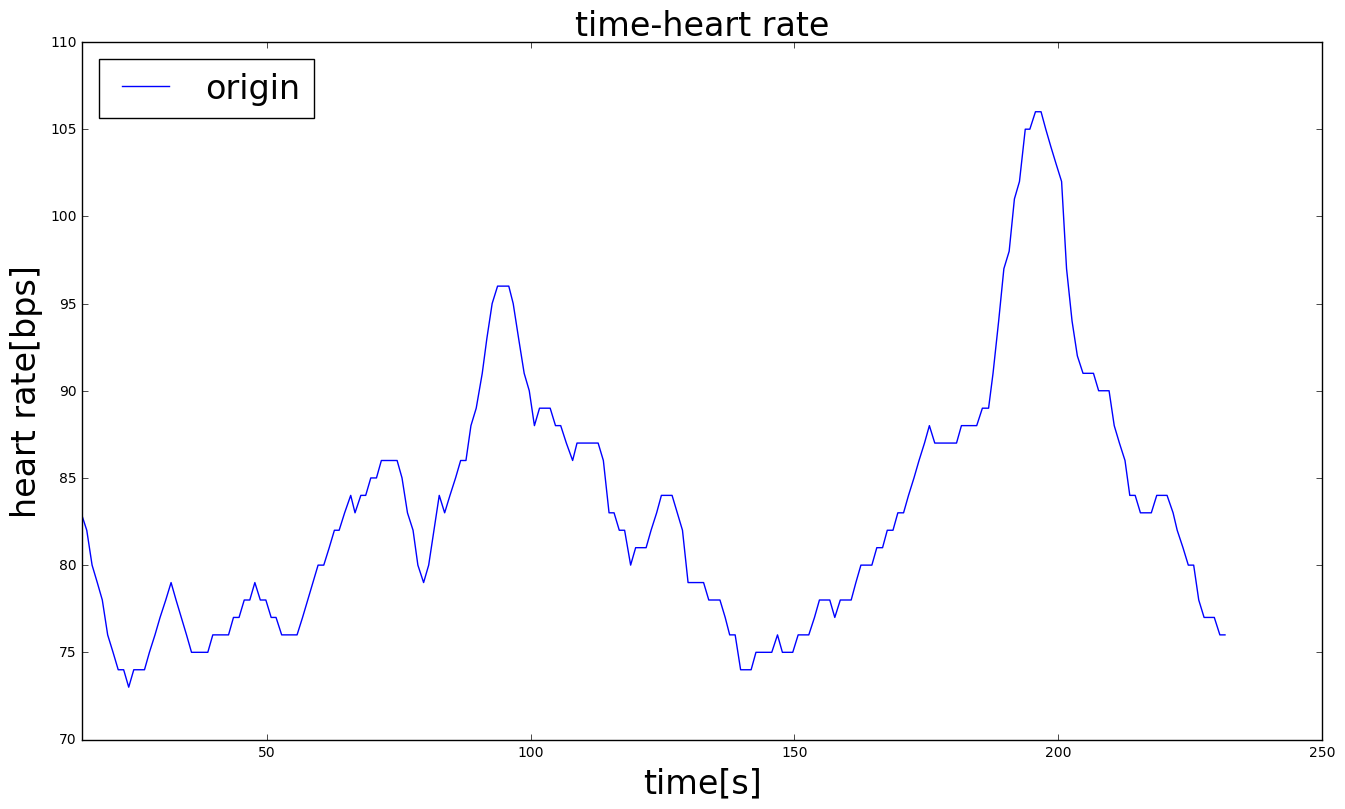

In [9]:
plt.figure(figsize=(16, 9))
plt.plot(data.T[0]/1000, data.T[1], label="origin")
plt.xlabel("time[s]", fontsize=24)
plt.ylabel("heart rate[bps]", fontsize=24)
plt.title("time-heart rate", fontsize=24)
plt.xlim(15, 250)
plt.legend(loc='upper left', fontsize=24)
plt.savefig("origin_only.png")

In [10]:
data_range = 50

In [11]:
mean_data = [np.mean(data.T[1][0]) if i == 0 else np.mean(data.T[1][0:i]) if i < data_range else np.mean(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)

In [12]:
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)

In [13]:
np.mean(data.T[1])

83.22413793103448

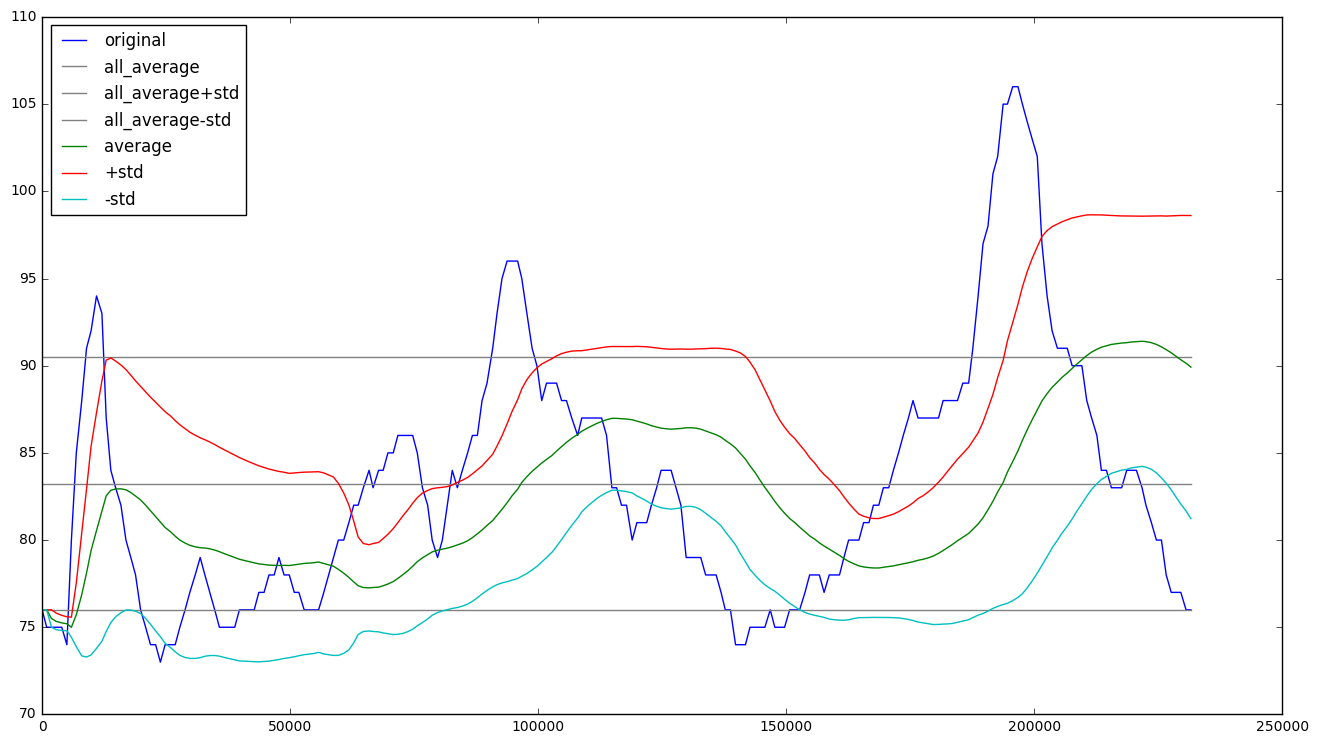

In [14]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data, label="+std")
plt.plot(data.T[0], mean_data-std_data, label="-std")
plt.legend(loc='upper left')

In [15]:
WMA = lambda data: sum([(i+1)*value for i,value in enumerate(data)])/ sum(range(len(data)+1))
WMA_std = lambda data: np.sqrt(1/len(data)*np.sum(np.power(data-WMA(data), 2)))

In [16]:
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)

In [17]:
std_data = [0 if i == 0 else WMA_std(data.T[1][0:i]) if i < data_range else WMA_std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)

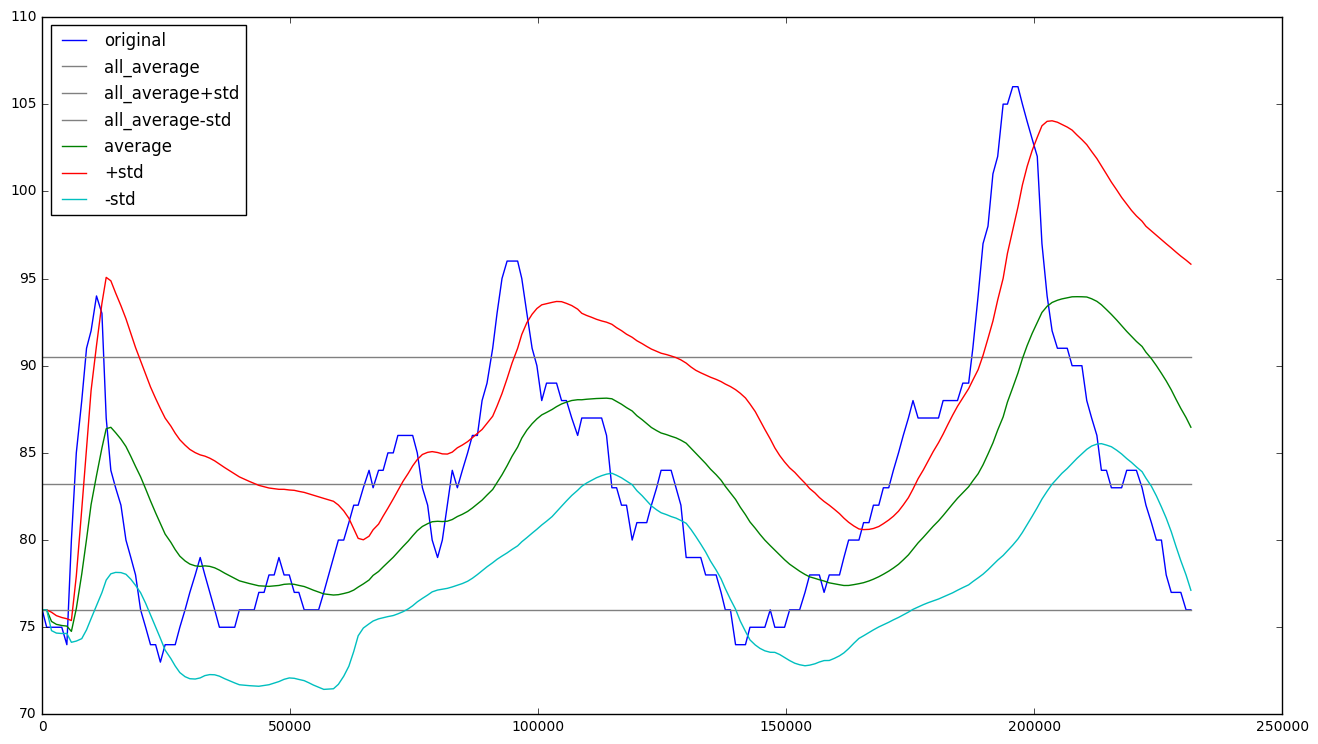

In [18]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data, label="+std")
plt.plot(data.T[0], mean_data-std_data, label="-std")
plt.legend(loc='upper left')

# compare

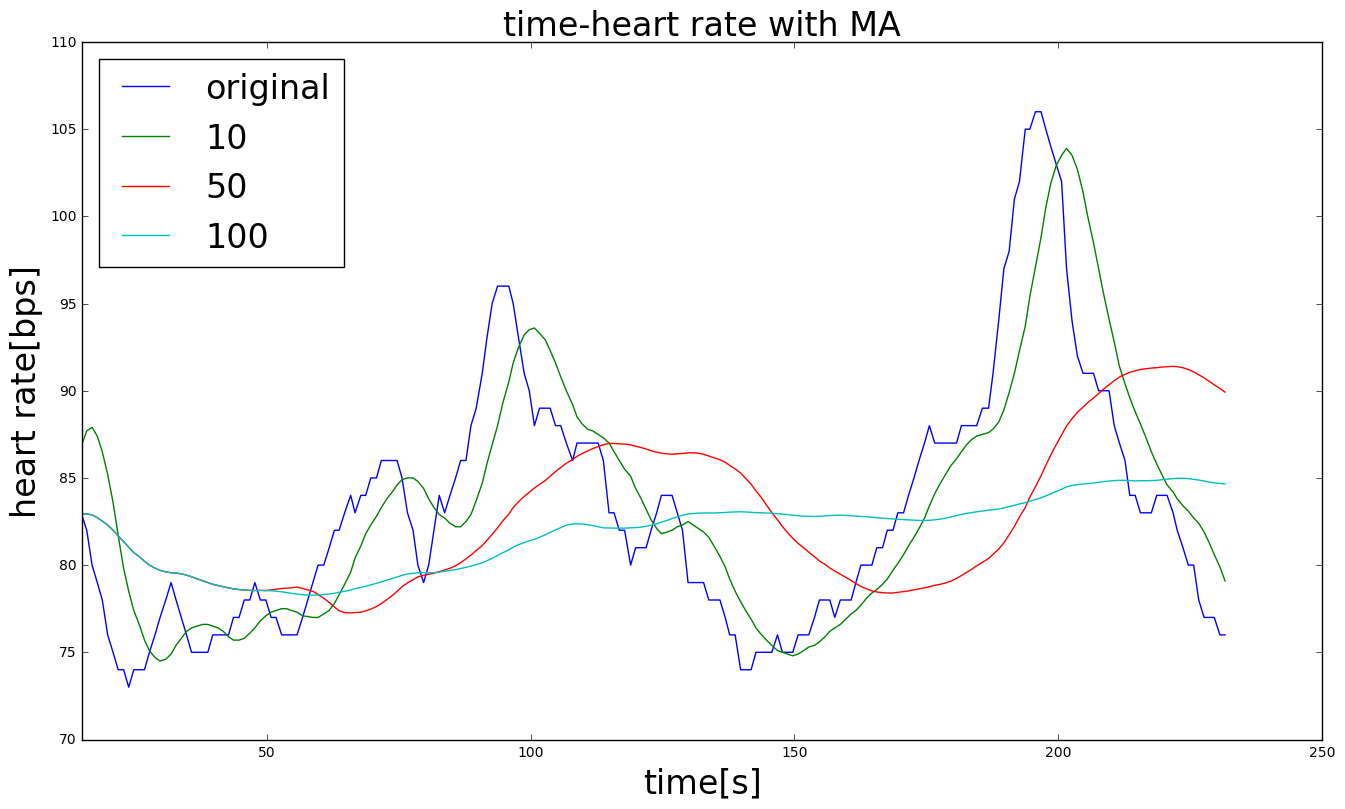

In [19]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0]/1000, data.T[1], label="original")
#plt.plot(data.T[0]/1000, [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
#plt.plot(data.T[0]/1000, [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
#plt.plot(data.T[0]/1000, [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
data_range= 10
mean_data = [np.mean(data.T[1][0]) if i == 0 else np.mean(data.T[1][0:i]) if i < data_range else np.mean(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0]/1000, mean_data, label=str(data_range))

data_range= 50
mean_data = [np.mean(data.T[1][0]) if i == 0 else np.mean(data.T[1][0:i]) if i < data_range else np.mean(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0]/1000, mean_data, label=str(data_range))
#plt.plot(data.T[0]/1000, mean_data+std_data, label="+std")
#plt.plot(data.T[0]/1000, mean_data-std_data, label="-std")
data_range= 100
mean_data = [np.mean(data.T[1][0]) if i == 0 else np.mean(data.T[1][0:i]) if i < data_range else np.mean(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0]/1000, mean_data, label=str(data_range))
#plt.plot(data.T[0]/1000, mean_data+std_data, label="+std")
#plt.plot(data.T[0]/1000, mean_data-std_data, label="-std")
plt.legend(loc='upper left')
plt.xlabel("time[s]", fontsize=24)
plt.ylabel("heart rate[bps]", fontsize=24)
plt.title("time-heart rate with MA", fontsize=24)
plt.xlim(15, 250)
plt.legend(loc='upper left', fontsize=24)
plt.savefig("with_ma.png")

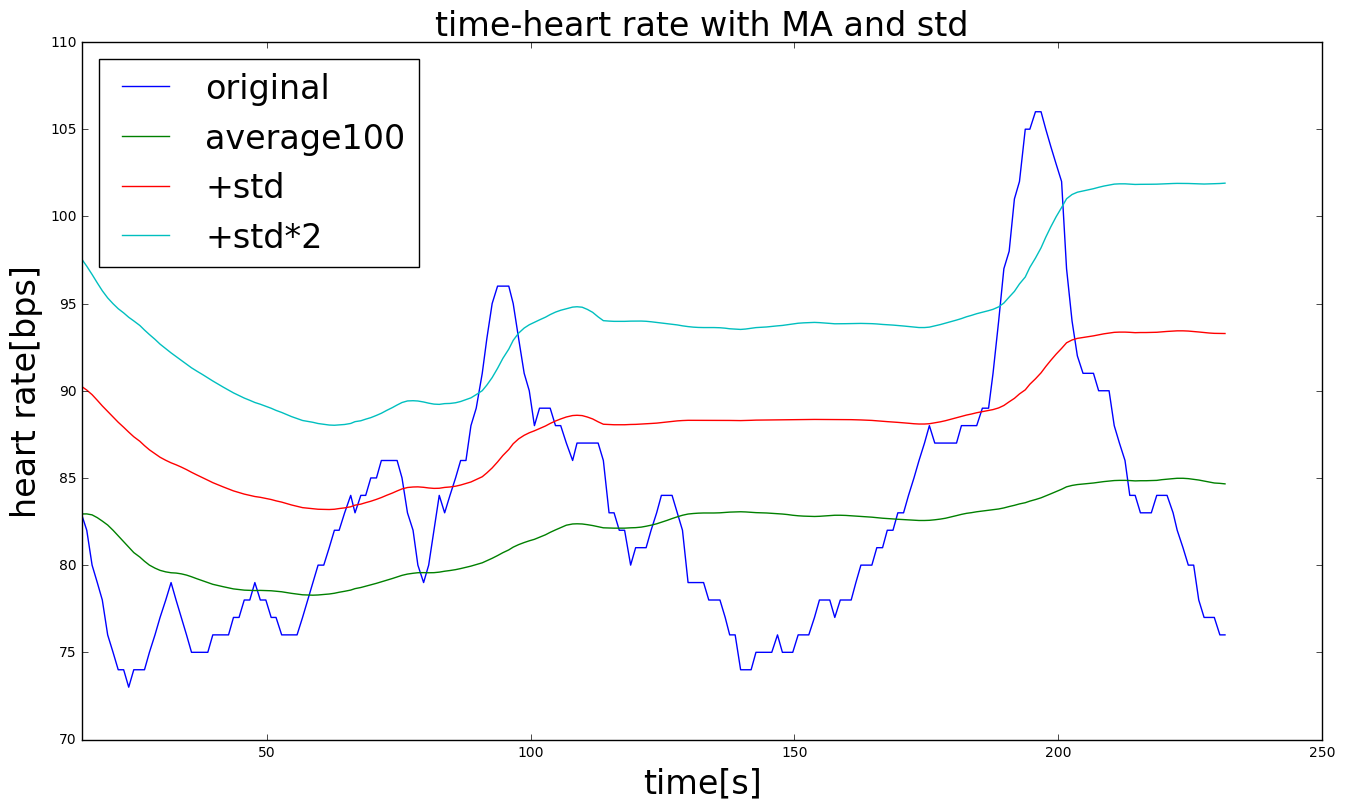

In [20]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0]/1000, data.T[1], label="original")
#plt.plot(data.T[0]/1000, [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
#plt.plot(data.T[0]/1000, [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
#plt.plot(data.T[0]/1000, [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
data_range= 100
mean_data = [np.mean(data.T[1][0]) if i == 0 else np.mean(data.T[1][0:i]) if i < data_range else np.mean(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0]/1000, mean_data, label="averag
         e"+str(data_range))
plt.plot(data.T[0]/1000, mean_data+std_data, label="+std")
plt.plot(data.T[0]/1000, mean_data+std_data*2, label="+std*2")
plt.xlabel("time[s]", fontsize=24)
plt.ylabel("heart rate[bps]", fontsize=24)
plt.title("time-heart rate with MA and std", fontsize=24)
plt.xlim(15, 250)
plt.legend(loc='upper left', fontsize=24)
plt.savefig("with_ma+std.png")

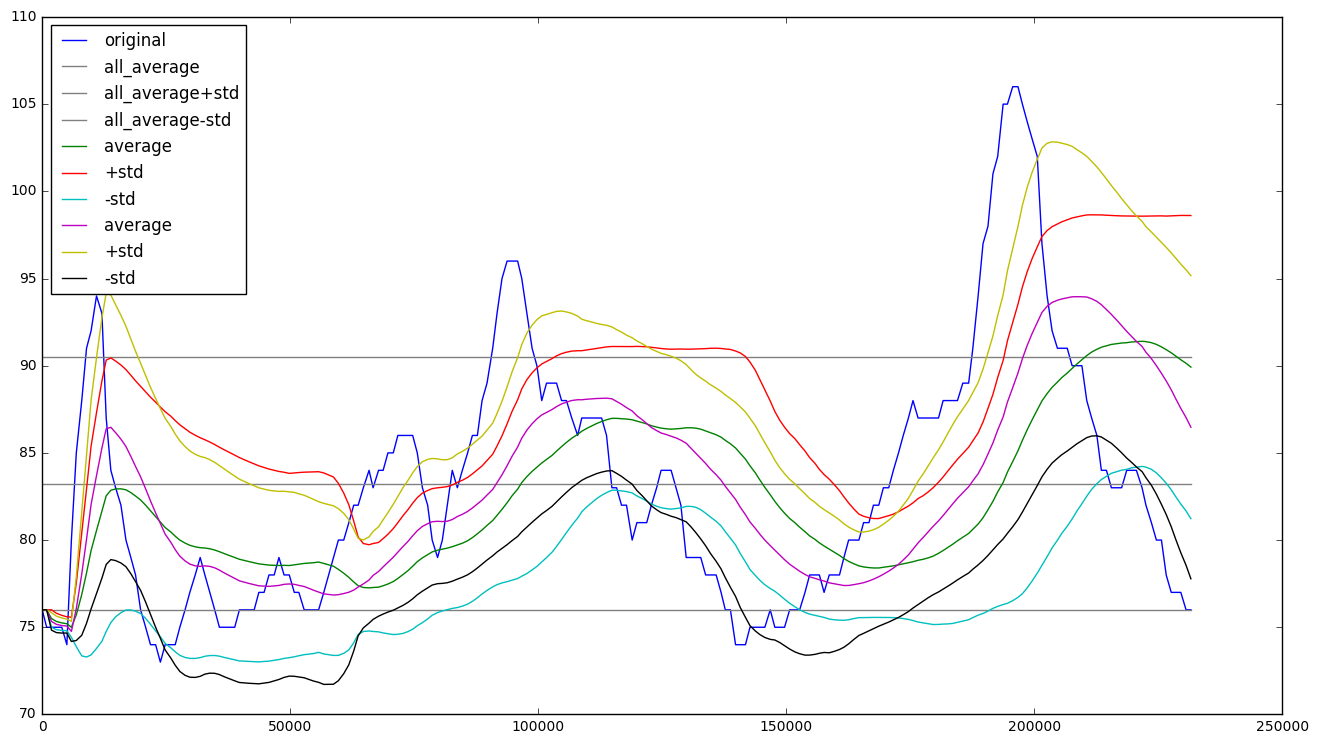

In [21]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
data_range= 50
mean_data = [np.mean(data.T[1][0]) if i == 0 else np.mean(data.T[1][0:i]) if i < data_range else np.mean(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data, label="+std")
plt.plot(data.T[0], mean_data-std_data, label="-std")
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data, label="+std")
plt.plot(data.T[0], mean_data-std_data, label="-std")
plt.legend(loc='upper left')

# detection

## normal

In [22]:
data_range = 100

In [67]:
def normal_detection(data, rate=1):
    mean_data = [np.mean(data.T[1][0]) if i == 0 else np.mean(data.T[1][0:i]) if i < data_range else np.mean(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
    mean_data = np.asarray(mean_data)
    std_data = [0 if i == 0 else WMA_std(data.T[1][0:i]) if i < data_range else WMA_std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
    std_data = np.asarray(std_data)
    upper = data.T[1] > (mean_data+std_data*rate)
    upper_point = [i for i in range(len(upper)-2) if not upper[i] and upper[i+1]]
    lower_point = [i for i in range(len(upper)-2) if upper[i] and not upper[i+1]]
    point = []
    for u,l in zip(upper_point, lower_point):
        point.append(u+np.argmax(data[u:l].T[1]))
    return data[point]

[[  7979     88]
 [ 93733     96]
 [195672    106]]


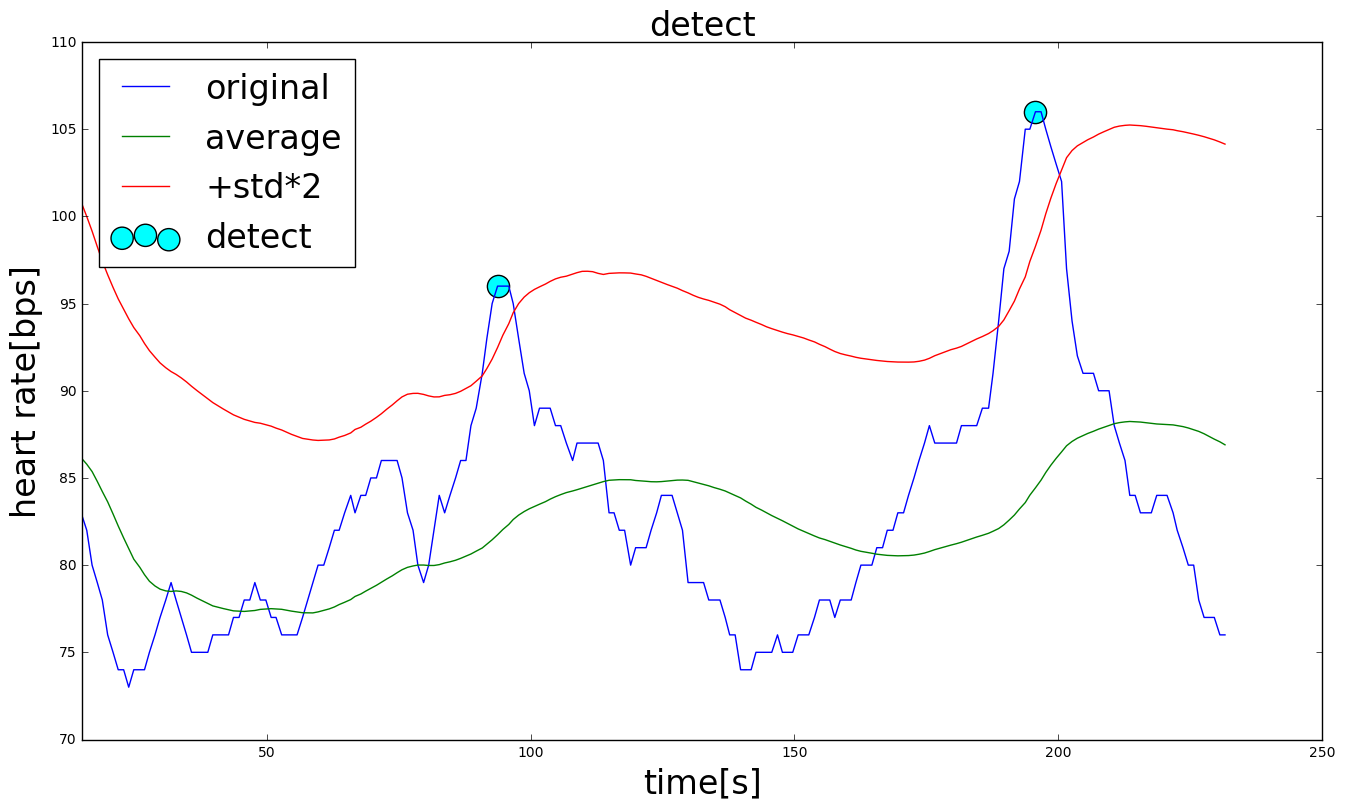

In [69]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0]/1000, data.T[1], label="original")
#plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
#plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
#plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0]/1000, mean_data, label="average")
plt.plot(data.T[0]/1000, mean_data+std_data*2, label="+std*2")
#plt.plot(data.T[0], mean_data-std_data, label="-std")
detect = normal_detection(data, 2)
plt.scatter(detect.T[0]/1000, detect.T[1], c="cyan", s=256, label="detect")
plt.xlabel("time[s]", fontsize=24)
plt.ylabel("heart rate[bps]", fontsize=24)
plt.title("detect", fontsize=24)
plt.xlim(15, 250)
plt.legend(loc='upper left', fontsize=24)
plt.savefig("detect.png")

## WMA

In [19]:
data_range = 50

In [20]:
def WMA_detection(data, rate=1):
    mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
    mean_data = np.asarray(mean_data)
    std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
                 for i in range(len(data.T[1]))]
    std_data = np.asarray(std_data)
    upper = data.T[1] > (mean_data+std_data*rate)
    upper_point = [i for i in range(len(upper)-2) if not upper[i] and upper[i+1]]
    return data[upper_point]

In [21]:
WMA_detection(data)

array([[  4977,     74],
       [ 61828,     81],
       [ 85774,     85],
       [164668,     80]], dtype=int64)

## compare rate

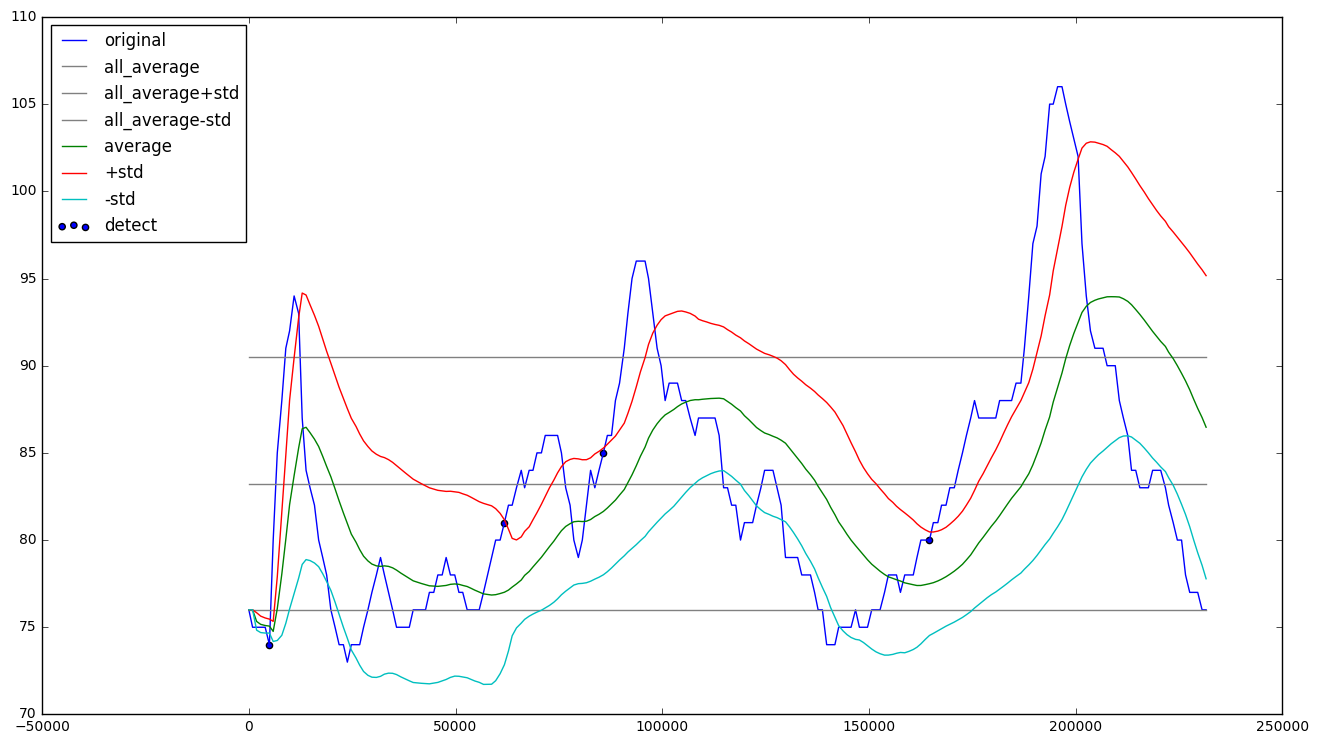

In [22]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data, label="+std")
plt.plot(data.T[0], mean_data-std_data, label="-std")
detect = WMA_detection(data)
plt.scatter(detect.T[0], detect.T[1], label="detect")
plt.legend(loc='upper left')

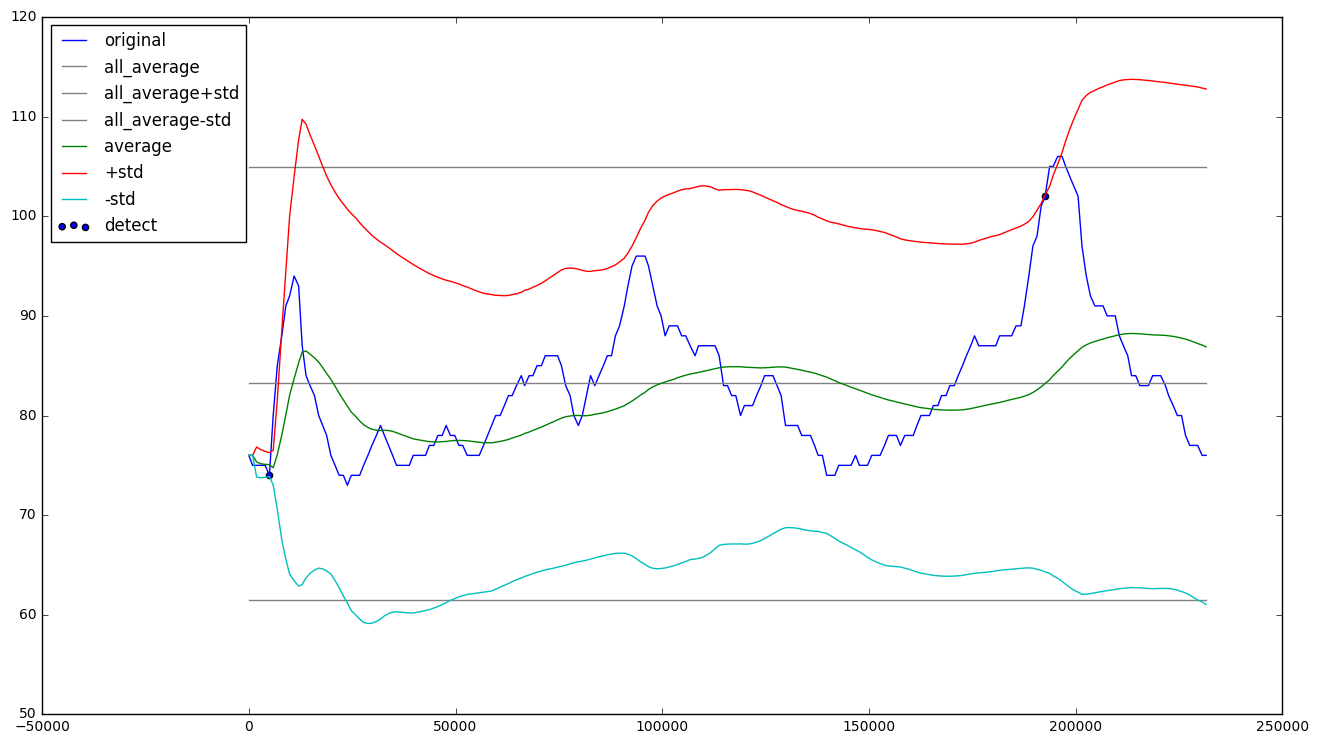

In [255]:
plt.figure(figsize=(16,9))
rate = 3
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])*rate]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])*rate]*data.shape[0], c="gray", label="all_average-std")
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data*rate, label="+std")
plt.plot(data.T[0], mean_data-std_data*rate, label="-std")
detect = WMA_detection(data, rate)
plt.scatter(detect.T[0], detect.T[1], label="detect")
plt.legend(loc='upper left')

In [256]:
data_range = 10
def WMA_detection(data, rate=1):
    mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
    mean_data = np.asarray(mean_data)
    std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
                 for i in range(len(data.T[1]))]
    std_data = np.asarray(std_data)
    upper = data.T[1] > (mean_data+std_data*rate)
    upper_point = [i for i in range(len(upper)-2) if not upper[i] and upper[i+1]]
    return data[upper_point]

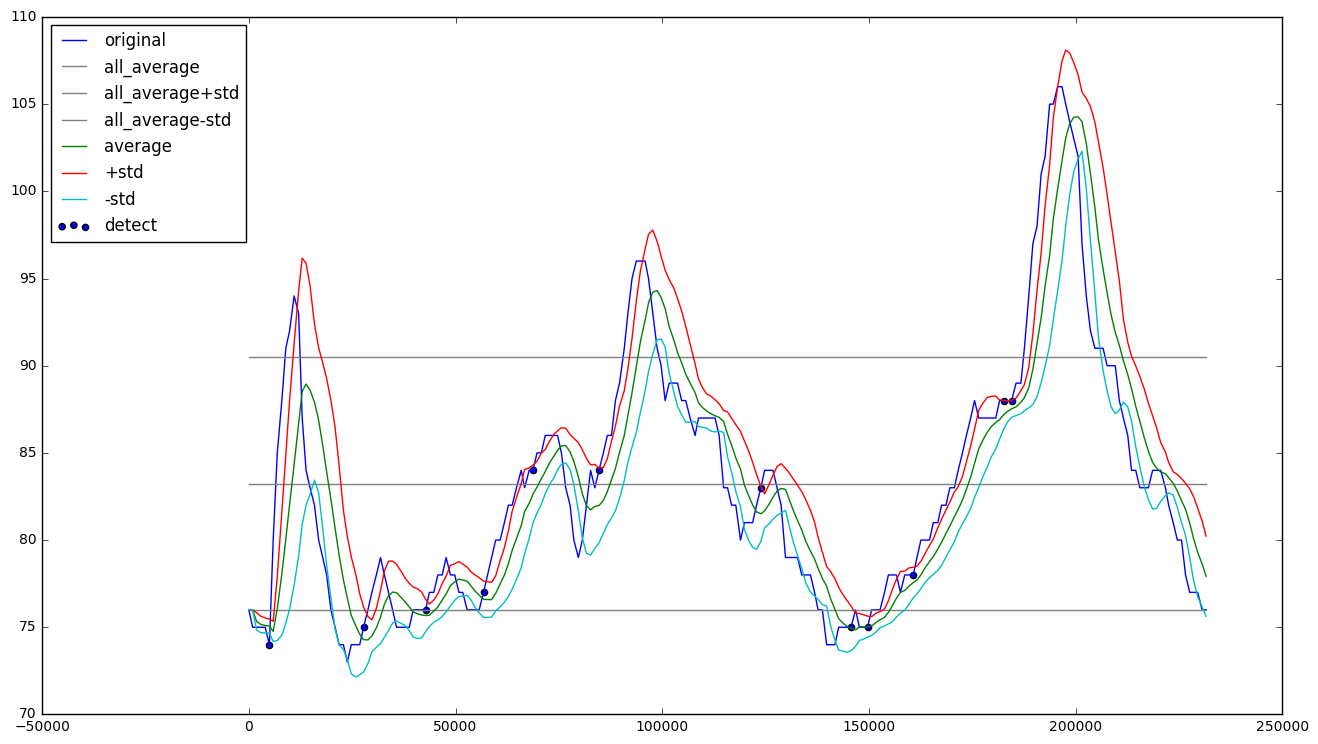

In [257]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data, label="+std")
plt.plot(data.T[0], mean_data-std_data, label="-std")
detect = WMA_detection(data)
plt.scatter(detect.T[0], detect.T[1], label="detect")
plt.legend(loc='upper left')

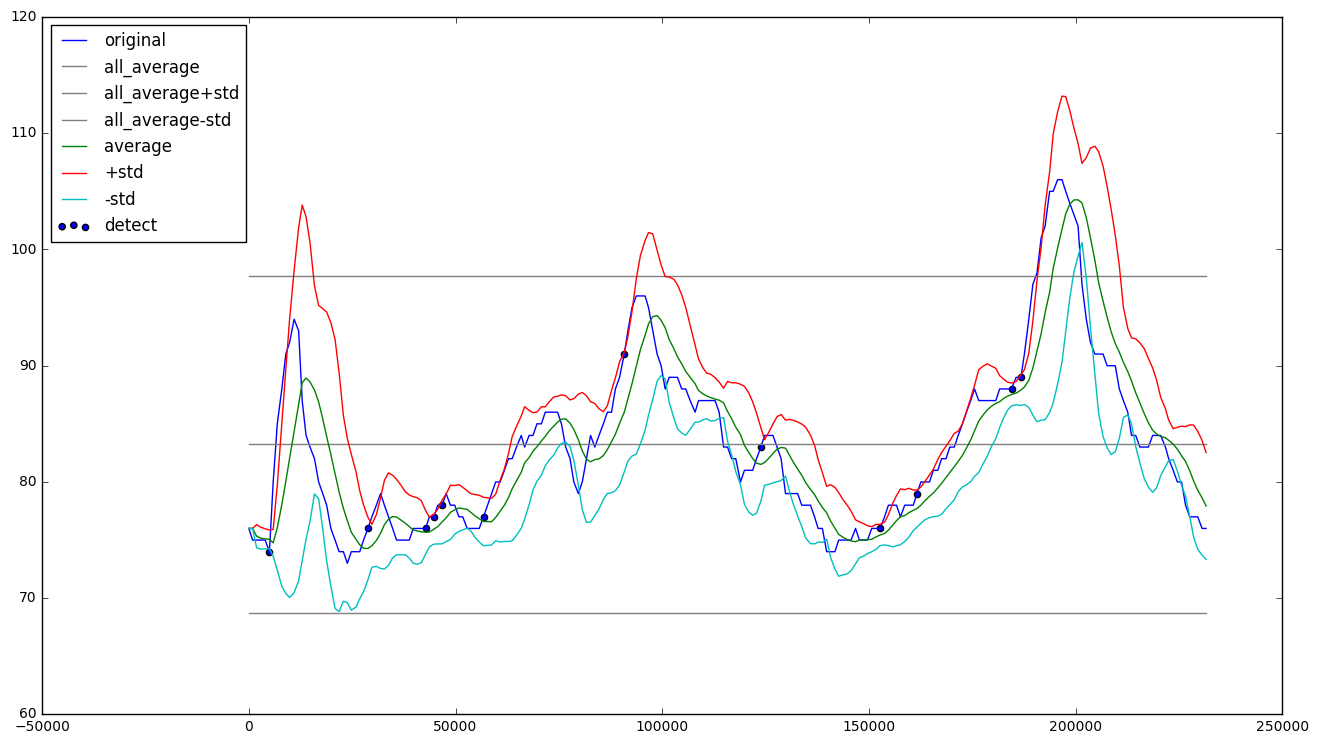

In [258]:
plt.figure(figsize=(16,9))
rate = 2
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])*rate]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])*rate]*data.shape[0], c="gray", label="all_average-std")
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data*rate, label="+std")
plt.plot(data.T[0], mean_data-std_data*rate, label="-std")
detect = WMA_detection(data, rate)
plt.scatter(detect.T[0], detect.T[1], label="detect")
plt.legend(loc='upper left')

## compare normal mean + std

In [250]:
data_range = 50

In [251]:
def WMA_detection_against_normal(data, rate=1):
    mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
    mean_data = np.asarray(mean_data)
    std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
                 for i in range(len(data.T[1]))]
    std_data = np.asarray(std_data)
    upper = (mean_data+std_data) > np.mean(data.T[1])+np.std(data.T[1])*rate
    upper_point = [i for i in range(len(upper)-2) if not upper[i] and upper[i+1]]
    return data[upper_point]

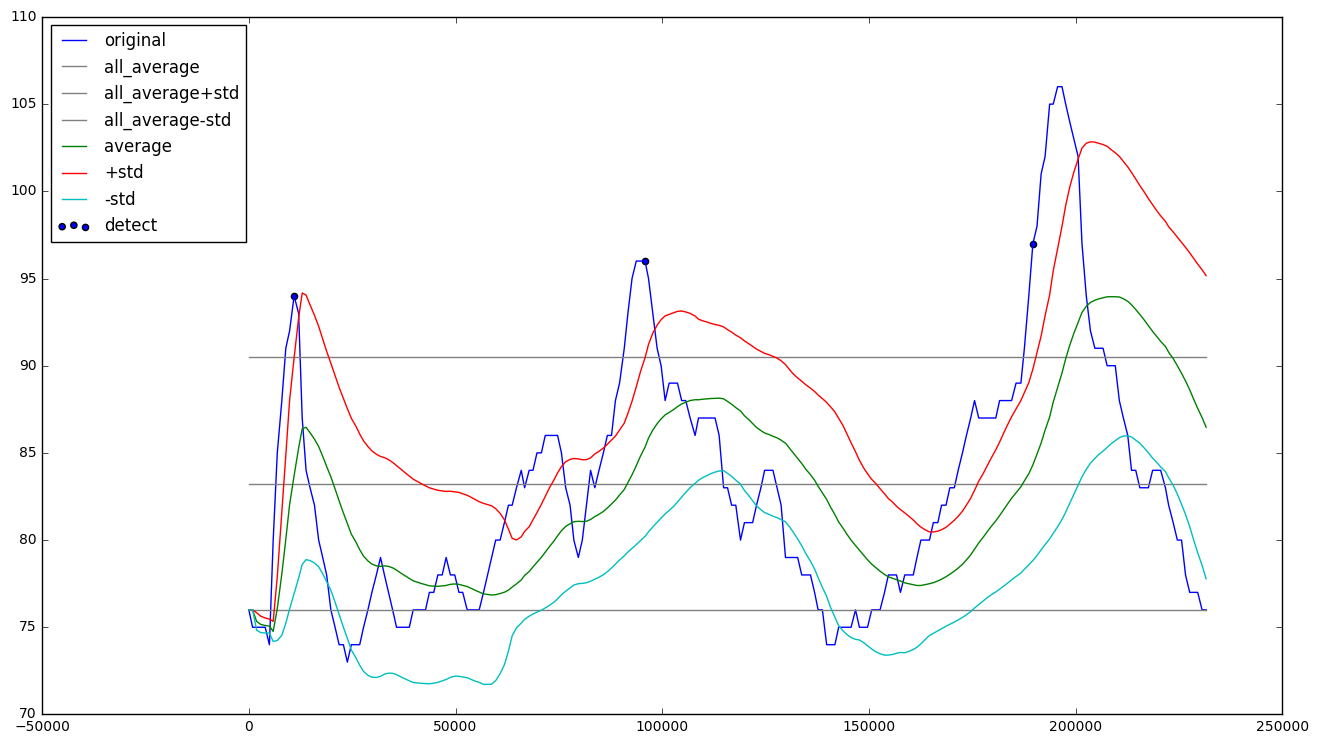

In [252]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data, label="+std")
plt.plot(data.T[0], mean_data-std_data, label="-std")
detect = WMA_detection_against_normal(data)
plt.scatter(detect.T[0], detect.T[1], label="detect")
plt.legend(loc='upper left')

In [253]:
data_range = 100
def WMA_detection_against_normal(data, rate=1):
    mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
    mean_data = np.asarray(mean_data)
    std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
                 for i in range(len(data.T[1]))]
    std_data = np.asarray(std_data)
    upper = (mean_data+std_data) > np.mean(data.T[1])+np.std(data.T[1])*rate
    upper_point = [i for i in range(len(upper)-2) if not upper[i] and upper[i+1]]
    return data[upper_point]

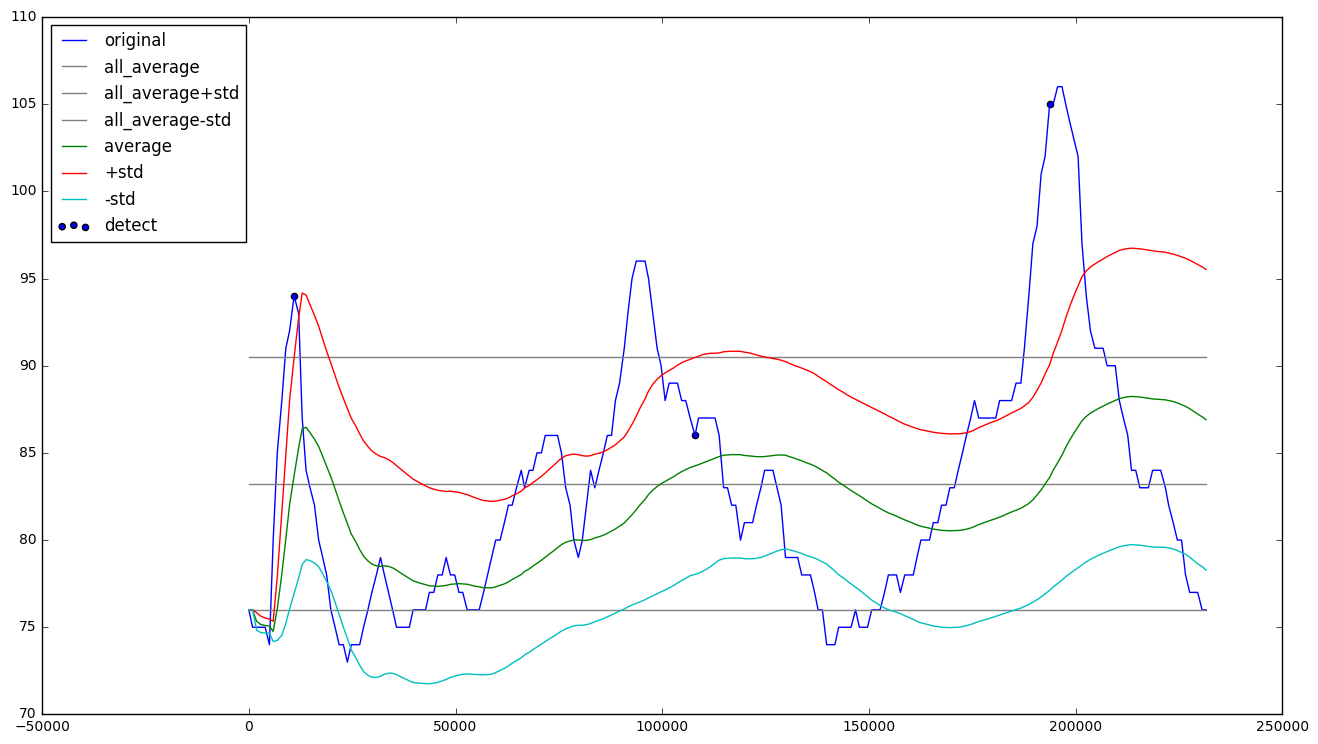

In [254]:
plt.figure(figsize=(16,9))
plt.plot(data.T[0], data.T[1], label="original")
plt.plot(data.T[0], [np.mean(data.T[1])]*data.shape[0], c="gray", label="all_average")
plt.plot(data.T[0], [np.mean(data.T[1])+np.std(data.T[1])]*data.shape[0], c="gray", label="all_average+std")
plt.plot(data.T[0], [np.mean(data.T[1])-np.std(data.T[1])]*data.shape[0], c="gray", label="all_average-std")
mean_data = [data.T[1][0] if i == 0 else WMA(data.T[1][0:i]) if i < data_range else WMA(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
mean_data = np.asarray(mean_data)
std_data = [np.std(data.T[1][0]) if i == 0 else np.std(data.T[1][0:i]) if i < data_range else np.std(data.T[1][i-data_range:i])
             for i in range(len(data.T[1]))]
std_data = np.asarray(std_data)
plt.plot(data.T[0], mean_data, label="average")
plt.plot(data.T[0], mean_data+std_data, label="+std")
plt.plot(data.T[0], mean_data-std_data, label="-std")
detect = WMA_detection_against_normal(data)
plt.scatter(detect.T[0], detect.T[1], label="detect")
plt.legend(loc='upper left')